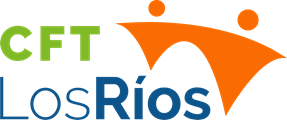

## UNIDAD IV: ESTADISTICA INFERENCIAL
#### PROFESOR: DIEGO MIRANDA
#### DATA SCIENTIST

### Modelo de regresion lineal simple con datos simulados

* y = a + b * x
* x = 100 valores distribuidos segun una N(1.5, 2.5) (media, std)
* Ye = 2 + 2.0 * x + e
* e = estara disribuida segun una N(0 , 0.8)

In [1]:
import pandas as pd
import numpy as np

x = 1.5 + 2.5 * np.random.randn(100)
error = 0 + 0.8 * np.random.randn(100)
y_pred = 2 + 2.0 * x # esto es lo que nos devuelve el modelo lineal
y_actual = 2 + 2.0 * x + error


x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_actual_list = y_actual.tolist()

In [2]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_actual_list,
        "y_prediccion":y_pred_list       
    }
)

data.head()

,x,y_actual,y_prediccion
0,0.929880,2.980720,3.859760
1,4.995703,12.459525,11.991406
2,3.071203,6.930301,8.142407
3,6.209660,14.347692,14.419320
4,4.214353,10.318870,10.428706


In [3]:
y_mean = [np.mean(y_actual)] * len(x_list)

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

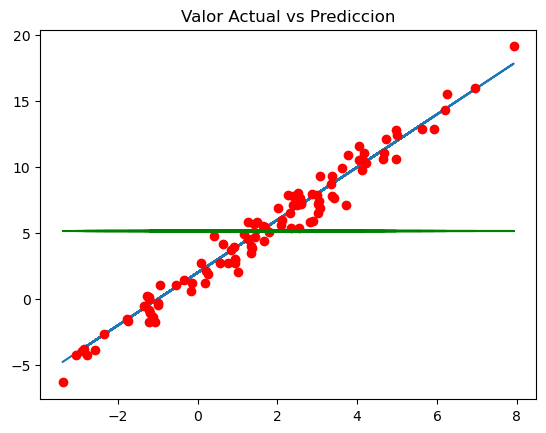

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_actual, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Prediccion")

* SUMA DE LOS CUADRADOS DE LAS DIFERENCIAS (SSD) = DISTANCIA ENTRE LOS VALORES ACTUALES Y LAS PREDICCIONES.
* SUMA DE LOS CUADRADOS TOTALES (SST) = DISTANCIA ENTRE LOS VALORES ACTUALES Y LA MEDIANA O IGUAL SE PUEDE REPRESENTAR CON EL PROMEDIO.
* SUMA DE LOS CUADRADOS DE LA REGRESION (SSR) = DISTANCIA ENTRE LAS PREDICCIONES Y LA MEDIANA O IGUAL SE PUEDE REPRESENTAR CON EL PROMEDIO
* SST = SSR + SSD
* R2 = SSR/SST

In [5]:
y_m = np.mean(y_actual)
data["SSR"] = (data["y_prediccion"]-y_m)**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-y_m)**2

In [6]:
data.head(10)

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.929880,2.980720,3.859760,1.700983,0.772712,4.766614
1,4.995703,12.459525,11.991406,46.613789,0.219135,53.225011
2,3.071203,6.930301,8.142407,8.871044,1.469200,3.119901
3,6.209660,14.347692,14.419320,85.661363,0.005131,84.340618
4,4.214353,10.318870,10.428706,27.717367,0.012064,26.572915
5,3.629223,9.897139,9.258446,16.764678,0.407928,22.402818
6,4.117510,9.785948,10.235020,25.715478,0.201666,21.362614
7,-1.765322,-1.511573,-1.530644,44.817950,0.000364,44.562975
8,-2.578387,-3.887803,-3.156775,69.234911,0.534402,81.934720
9,1.003307,2.064981,4.006614,1.339490,3.769939,9.603778


In [7]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [8]:
print("La suma de los cuadrados de la regresion es: ", SSR)
print("La suma de los cuadrados de las diferencias es: ", SSD)
print("La suma de los cuadrados totales: ", SST)

La suma de los cuadrados de la regresion es:  2326.213773175682
La suma de los cuadrados de las diferencias es:  79.93528676772358
La suma de los cuadrados totales:  2525.8131450168776


In [9]:
R2 = SSR/SST
R2

0.9209761924649965

(array([ 1.,  6., 12., 12., 24., 12., 16.,  9.,  6.,  2.]),
 array([-1.96483396, -1.53265821, -1.10048246, -0.66830671, -0.23613097,
         0.19604478,  0.62822053,  1.06039628,  1.49257203,  1.92474777,
         2.35692352]),
 <BarContainer object of 10 artists>)

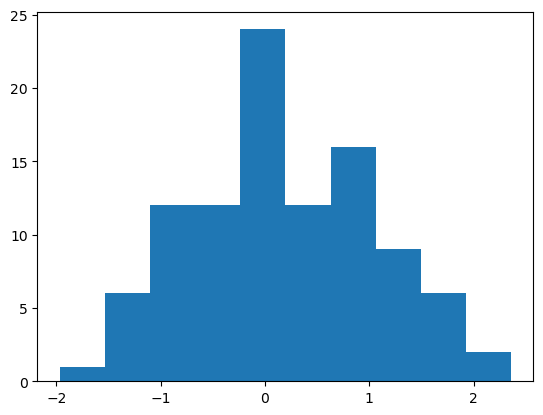

In [10]:
plt.hist(data["y_prediccion"]-data["y_actual"])

In [11]:
x_pred = 3.0  
y_pred = 2 + 2.0 * x_pred  

print("Predicción de y para x =", x_pred, "es", y_pred)

Predicción de y para x = 3.0 es 8.0


In [12]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.929880,2.980720,3.859760,1.700983,0.772712,4.766614
1,4.995703,12.459525,11.991406,46.613789,0.219135,53.225011
2,3.071203,6.930301,8.142407,8.871044,1.469200,3.119901
3,6.209660,14.347692,14.419320,85.661363,0.005131,84.340618
4,4.214353,10.318870,10.428706,27.717367,0.012064,26.572915


### Recta de la regresion
* y = a + b * x
* b = sum((xi-x_m)*(y_i-y_m))/sum((xi-x_m)**2)
* a = y_m-b*x_m

In [13]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.662167391728951, 5.163977158206651)

In [14]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

beta = sum(data["beta_n"])/sum(data["beta_d"])

alpha = y_mean - beta * x_mean

alpha, beta

(1.750364381322437, 2.0537117945343923)

### El modelo lineal obtenido por regresion es: 
* y = 2.0893476337688237 + 1.9340894476216242 * x

In [15]:
data["y_model"] = alpha + beta * data["x"]

data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.929880,2.980720,3.859760,1.700983,0.772712,4.766614,1.598772,0.536245,3.660070
1,4.995703,12.459525,11.991406,46.613789,0.219135,53.225011,24.319968,11.112461,12.010099
2,3.071203,6.930301,8.142407,8.871044,1.469200,3.119901,2.488814,1.985383,8.057731
3,6.209660,14.347692,14.419320,85.661363,0.005131,84.340618,41.762873,20.679687,14.503216
4,4.214353,10.318870,10.428706,27.717367,0.012064,26.572915,13.156241,6.513651,10.405431


In [16]:
SSR = sum((data["y_model"]-y_m)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_m)**2)

SSR, SSD, SST

(2450.125217014015, 75.68792800286442, 2525.8131450168776)

In [17]:
R2 = SSR/SST
R2

0.9700342330737388

### Validacion del modelo

#### El p-valor

* El modelo presenta una relacion lineal entre x e y: Ye = a + b * x
* H0: b = 0
* H1: b ≠ 0
* Si el p-valor resultante es menor que el nivel de significacion, rechazamos la hipotesis nula y aceptamos que existe una relacion lineal entre x e y